# Pipelines de procesamiento para variables numéricas

Vamos a usar la estadística descriptiva para el procesamiento de datos, pre modelo de ML o modelo predictivo.

## Escalamiento lineal

* **¿Por qué usarlos?** Es necesario escalar o normalizar los datos antes de pasarlos por un modelo de machine learning, pues estos modelos son eficientes porque los optimizadores para los cuales están diseñados, son optimos en la medida en que todos los atributos que consumen el modelo tienen las mismas dimensiones. Típicamente son eficientes en el rango $[-1,1]$, ese es el estándar. Lo ideal es transformar los datos a ese rango.

* **¿Hay diferentes tipos?** Los diferentes tipos se utlizan de acuerdo a lo que queremos hacer con el modelo, pero los escalamientos lineales los usamos típicamente cuando nuestros datos están uniformemente distribuidos o que los datas son simétricos. Algunos son: max-min, Clipping, Z-score, Winsorizing, etc.

* **¿Cuándo usarlos?** Cuando tenemos datos simétricos o uniformemente distribuidos.

### Tipos de escalamiento:

* **min-max**: Dada los datos, vamos a tener un valor **min** y un valor **max**. Cada dato que tenemos, se tiene que transformar a un dato normalizado $x \rightarrow x_{s}$, este se obtiene de:

$$x_{s} = \frac{2x- min - max}{max - min}$$

* **Clipping**: Tomamos la distribución y vamos a cortar todos los datos entre dos valores límite y asumimos que los datos dentro de los límites permanecen igual y los que quedan fuera serán colapsados.

$$x_{s} \in [lim \_ inf, lim \_ sup] \rightarrow x_{s}$$

$$x_{s} < lim \_ inf \rightarrow x_{s} = lim \_ inf$$

$$x_{s} > lim \_ sup \rightarrow x_{s} = lim \_ sup$$

Los extremos se pueden tomar de forma arbitraria o se pueden utilizar los percentiles. Cuando usamos los percentiles se llama de **Winzoridig**.

En muchos casos no se trabaja con este método de normalización porque estamos omitiendo datos que posiblemente sí nos están funcionando aunque sean outliers.

* **Z-Score**: Dado un conjunto de datos $\{x_{1}, \ldots, x_{n}\}$ calculamos $\mu$ y $\sigma$. Asumimos que tienen una distribución normal.

$$x_{s} = \frac{x - \mu}{\sigma}$$

Esta transformación sigue siendo una distribución normal con promedio 0 y una desviación estándar de 1.

## Escalamiento lineal de datos numéricos en Python

Cargamos las librerias a utilizar:
* **timeit**: Libreria para medir el tiempo de ejecución de los modelos
* **sklearn**: De la libreria sklearn importamos la función *datasets* que nos va a permitir descargar un dataset y la función *linear_model* que nos va a permitir hacer una regresión lineal sencilla para validar el efecto de transformar los datos.

In [ ]:
import timeit 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model 

Cargamos un dataset sobre diabetes, los detalles del dataset [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html).

* Con 
````
X, y = X, y = datasets.load_diabetes(return_X_y=True)
````

obtenemos $X=data$ y $y = target$.

* $X$ tiene dimensiones $(442,10)$, para nuestro estudio necesitamos una columna, buscamos que `raw`tenga dimensiones $(442,2)$, entonces de la línea siguiente
````
raw = X[:, None, 2]
````

1. `:` tomamos todas las columnas y filas.
2. `None` es lo mismo que `np.newaxis`, lo que hace es incrementar la dimensión, es decir
    - Convertir un array 1D en un array 2D
    - Convertir un array 2D en un array 3D
    Podemos encontrar algunos ejemplos [aquí](https://stackoverflow.com/questions/29241056/how-does-numpy-newaxis-work-and-when-to-use-it).
3. `2`Seleccionamos la tercera columna de $X$.

In [ ]:
X, y = datasets.load_diabetes(return_X_y=True)
raw = X[:, None, 2]
raw.shape

(442, 1)

### Reglas de escalamiento:

#### min-max

In [ ]:
#Regla de escalamiento:

max_raw = max(raw)
min_raw = min(raw)
scaled = (2*raw - max_raw - min_raw)/(max_raw - min_raw)

Para hacer una regla de escalamiento debemos de tener noción de cuál es la distribución de los datos. Vamos a hacer una gráfica de los datos originales versus los datos escalados.

Se observa que los datos escalados se encuentran en $[-1,1]$, aunque la distribución no es exactamente una gaussiana.

(array([32., 66., 98., 90., 64., 50., 23., 12.,  5.,  2.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

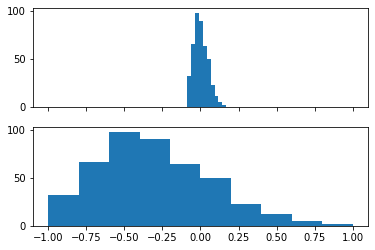

In [ ]:
fig, axs = plt.subplots(2, 1, sharex=True)
axs[0].hist(raw)
axs[1].hist(scaled)

Se validará que al entrenar un modelo, el efecto del escalamiento sea el apropiado. Definiremos una función que se encargará de entrenar el modelo. Esta función toma **linear_model** que se importa de sklearn, de ahí un modelo de regresión lineal y que ese modelo lo ajuste a los datos `raw`y `y`, donde la última es la variable a predecir, suponiendo un modelo.

Después, se define una función para medir el entrenamiento.

In [ ]:
# modelos para entrenamiento, definiremos una función que se encargará de entrenar el modelo

def train_raw():
    linear_model.LinearRegression().fit(raw,y,)

In [ ]:
def train_scaled():
    linear_model.LinearRegression().fit(scaled,y,)

Medimos ahora el tiempo de ejecución, lo hacemos con el atributo *timeit* de la función timeit, repitiendo la ejecución 100 veces para calcular el tiempo.

In [ ]:
raw_time = timeit.timeit(train_raw, number = 100)
scaled_time = timeit.timeit(train_scaled, number = 100)

print('train_raw : {}\ntrain_scaled : {}'.format(raw_time,scaled_time))

train_raw : 0.08350455600884743
train_scaled : 0.044173098998726346


El efecto de escalar datos sí contribuye a que el algoritmo tenga una mejor convergencia.

* **max-min scaling:** mejor para datos uniformemente distribuidos.
* **z-score scaling**: mejor para datos distribuidos normalmente (forma de campana de gauss).

#### z-score

In [ ]:
# regla de escalamiento

mu = np.average(raw)
sigma = np.std(raw)

z_scaled = (raw - mu ) / sigma

(array([32., 66., 98., 90., 64., 50., 23., 12.,  5.,  2.]),
 array([-1.89792941, -1.34956464, -0.80119987, -0.2528351 ,  0.29552967,
         0.84389444,  1.39225921,  1.94062398,  2.48898875,  3.03735352,
         3.58571828]),
 <BarContainer object of 10 artists>)

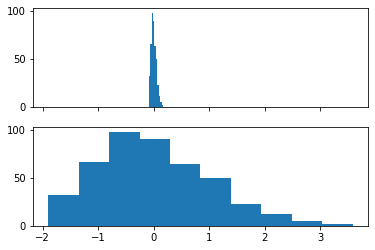

In [ ]:
fig, axs = plt.subplots(2, 1, sharex=True)
axs[0].hist(raw)
axs[1].hist(z_scaled)

In [ ]:
def train_z_scaled():
    linear_model.LinearRegression().fit(z_scaled,y,)

In [ ]:
raw_time = timeit.timeit(train_raw, number = 100)
z_scaled_time = timeit.timeit(train_z_scaled, number = 100)

print('train_raw : {}\ntrain_scaled : {}'.format(raw_time,z_scaled_time))

train_raw : 0.07726059800188523
train_scaled : 0.06962709699291736


### min-max vs z-score

Observemos los histogramas y los tiempos de ejecución:

(array([32., 66., 98., 90., 64., 50., 23., 12.,  5.,  2.]),
 array([-1.89792941, -1.34956464, -0.80119987, -0.2528351 ,  0.29552967,
         0.84389444,  1.39225921,  1.94062398,  2.48898875,  3.03735352,
         3.58571828]),
 <BarContainer object of 10 artists>)

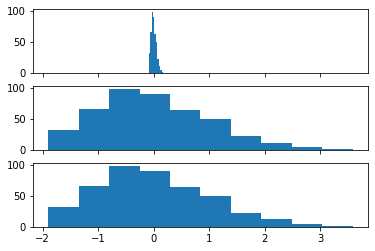

In [ ]:
fig, axs = plt.subplots(3, 1, sharex=True)
axs[0].hist(raw)
axs[1].hist(scaled)
axs[2].hist(z_scaled)

In [ ]:
raw_time = timeit.timeit(train_raw, number = 100)
scaled_time = timeit.timeit(train_scaled, number = 100)
z_scaled_time = timeit.timeit(train_z_scaled, number = 100)

print('train_raw : {}\ntrain_scaled : {}\ntrain_z_scaled : {}'.format(raw_time,scaled_time,z_scaled_time))

train_raw : 0.08021430300141219
train_scaled : 0.06744594201154541
train_z_scaled : 0.048892212013015524


## Transformación no lineal

* **¿Por qué usarlos?**  Se utiliza para datos fuertemente sesgados, no simétricos.

* **¿Hay diferentes tipos?**: Funciones no lineales, logaritmos, sigmoides, polinomios de grado mayor a 2.

* **¿Cuándo usarlos?**: Antes de escalamientos lineales.

### Formas de normalizar:

#### tanh(x)

Consideramos una distribución altamente sesgada. La idea de considerar $y = tanh(x)$ es que el rango de la función es $[-1,1]$, cuando interpretamos a $x$ como los datos originales y los datos transformados como $y$, es decir, $$x_{s} = tanh(x)$$.

En la siguiente imagen observamos cómo hace el escalamiento de los datos dependiendo de donde se tomen. Se hace un escalamiento, pero no sucede de manera homogénea.

![trans](tanh.png)

El resultado es que la distribución que se obtenga podría tener un sesgo reducido y tal vez no uniforme, pero más simétrica. 

El parámetro de simetrización se puede calibrar dependiendo de la función de transformación que se esté utilizando. 

Podemos hacer $y = tanh(\frac{x}{a})$ y dependiendo de los valores del parámetro $a$, podríamos calibrar la transformación de los datos para que queden más simétricos.

#### $\sqrt{x}$

$\sqrt{x}$ cumple un criterio similar.

![raiz](raiz.png)

Podemos usar otro tipo de funciones $x^{n}$ con $n > 0$ y dependiendo de eso vamos a obtener diferentes efectos en la distribución.

### Transformaciones no lineales en Python



En el dataset de autos usados, la distribución estaba fuertemente sesgada. Por lo que trabajaremos con este.

In [ ]:
df = pd.read_csv('cars.csv')

<AxesSubplot:>

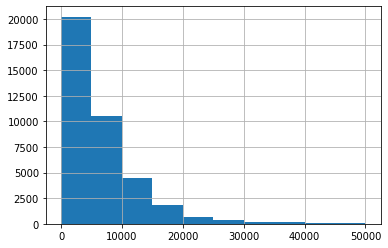

In [ ]:
df.price_usd.hist()

Vamos a utilizar la transformación con $tanh(x)$. Se puede obtener también con:

````
df.price_usd.apply(lambda x: np.tanh(x))
````

<AxesSubplot:>

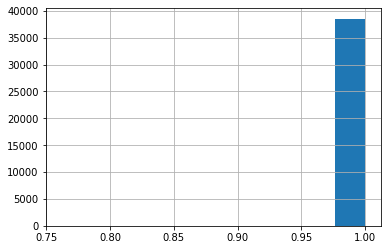

In [ ]:
df.price_usd.apply(np.tanh).hist()

<AxesSubplot:>

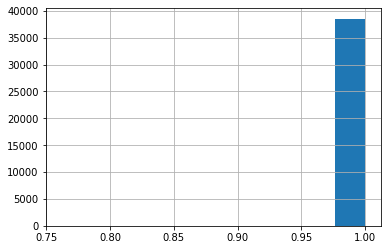

In [ ]:
df.price_usd.apply(lambda x: np.tanh(x)).hist()

Observamos que la función colapsó todo a un sólo valor, esto se debe a que la $tanh(x)$ se puede calibrar por un argumento $a$.

Si tomamos $a = 10 000$.

<AxesSubplot:>

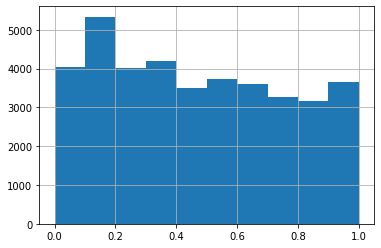

In [ ]:
df.price_usd.apply(lambda x: np.tanh(x/10000)).hist()

[Aquí](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html#sphx-glr-auto-examples-preprocessing-plot-map-data-to-normal-py) podemos encontrar un ejercicio completo de como mapear datos a distribuciones normales utilizando diferentes métodos.

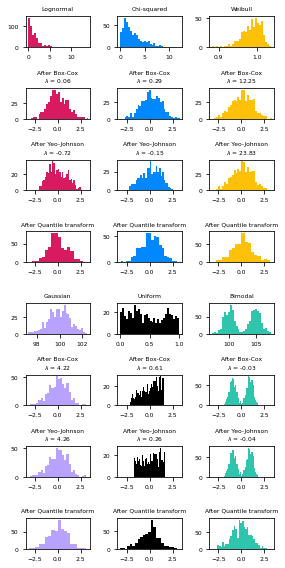

In [ ]:
# Author: Eric Chang <ericchang2017@u.northwestern.edu>
#         Nicolas Hug <contact@nicolas-hug.com>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split


N_SAMPLES = 1000
FONT_SIZE = 6
BINS = 30


rng = np.random.RandomState(304)
bc = PowerTransformer(method="box-cox")
yj = PowerTransformer(method="yeo-johnson")
# n_quantiles is set to the training set size rather than the default value
# to avoid a warning being raised by this example
qt = QuantileTransformer(
    n_quantiles=500, output_distribution="normal", random_state=rng
)
size = (N_SAMPLES, 1)


# lognormal distribution
X_lognormal = rng.lognormal(size=size)

# chi-squared distribution
df = 3
X_chisq = rng.chisquare(df=df, size=size)

# weibull distribution
a = 50
X_weibull = rng.weibull(a=a, size=size)

# gaussian distribution
loc = 100
X_gaussian = rng.normal(loc=loc, size=size)

# uniform distribution
X_uniform = rng.uniform(low=0, high=1, size=size)

# bimodal distribution
loc_a, loc_b = 100, 105
X_a, X_b = rng.normal(loc=loc_a, size=size), rng.normal(loc=loc_b, size=size)
X_bimodal = np.concatenate([X_a, X_b], axis=0)


# create plots
distributions = [
    ("Lognormal", X_lognormal),
    ("Chi-squared", X_chisq),
    ("Weibull", X_weibull),
    ("Gaussian", X_gaussian),
    ("Uniform", X_uniform),
    ("Bimodal", X_bimodal),
]

colors = ["#D81B60", "#0188FF", "#FFC107", "#B7A2FF", "#000000", "#2EC5AC"]

fig, axes = plt.subplots(nrows=8, ncols=3, figsize=plt.figaspect(2))
axes = axes.flatten()
axes_idxs = [
    (0, 3, 6, 9),
    (1, 4, 7, 10),
    (2, 5, 8, 11),
    (12, 15, 18, 21),
    (13, 16, 19, 22),
    (14, 17, 20, 23),
]
axes_list = [(axes[i], axes[j], axes[k], axes[l]) for (i, j, k, l) in axes_idxs]


for distribution, color, axes in zip(distributions, colors, axes_list):
    name, X = distribution
    X_train, X_test = train_test_split(X, test_size=0.5)

    # perform power transforms and quantile transform
    X_trans_bc = bc.fit(X_train).transform(X_test)
    lmbda_bc = round(bc.lambdas_[0], 2)
    X_trans_yj = yj.fit(X_train).transform(X_test)
    lmbda_yj = round(yj.lambdas_[0], 2)
    X_trans_qt = qt.fit(X_train).transform(X_test)

    ax_original, ax_bc, ax_yj, ax_qt = axes

    ax_original.hist(X_train, color=color, bins=BINS)
    ax_original.set_title(name, fontsize=FONT_SIZE)
    ax_original.tick_params(axis="both", which="major", labelsize=FONT_SIZE)

    for ax, X_trans, meth_name, lmbda in zip(
        (ax_bc, ax_yj, ax_qt),
        (X_trans_bc, X_trans_yj, X_trans_qt),
        ("Box-Cox", "Yeo-Johnson", "Quantile transform"),
        (lmbda_bc, lmbda_yj, None),
    ):
        ax.hist(X_trans, color=color, bins=BINS)
        title = "After {}".format(meth_name)
        if lmbda is not None:
            title += "\n$\\lambda$ = {}".format(lmbda)
        ax.set_title(title, fontsize=FONT_SIZE)
        ax.tick_params(axis="both", which="major", labelsize=FONT_SIZE)
        ax.set_xlim([-3.5, 3.5])


plt.tight_layout()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8b8f8c16-0c57-41f8-8529-691d02522b0e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>